In [28]:
pip install seaborn

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\aabub\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.6-cp310-cp310-win_amd64.whl (163 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)


In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [30]:
# importing the Diabetes dataset 
Diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
Diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [31]:

# Split the dataset to features & target variable
X = Diabetes_df.drop("Diabetes_012",axis=1)
y = Diabetes_df["Diabetes_012"]

In [32]:

# Split the dataset to train & test datasets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [33]:
# Select the most effective featuers using SelectKBest and chi2 to reduce the number of featuers "dimensionality reduction"
chi2_selector = SelectKBest(chi2,k=10)
kbest = chi2_selector.fit_transform(X,y)

In [34]:
# Creating an array of the selected columns
selected_columns = np.asarray(Diabetes_df.columns[1:])[chi2_selector.get_support()]
selected_columns

array(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'], dtype=object)

In [35]:
#Create new DataFrame called X_new to contain the new selected featuers and adding the Sex featuer to the new DataFrame
X_new = Diabetes_df[selected_columns]
X_new['Sex'] = Diabetes_df['Sex']

C:\Users\aabub\AppData\Local\Temp\ipykernel_36092\667618933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Sex'] = Diabetes_df['Sex']


In [36]:
X_new.columns

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income', 'Sex'],
      dtype='object')

<AxesSubplot: >

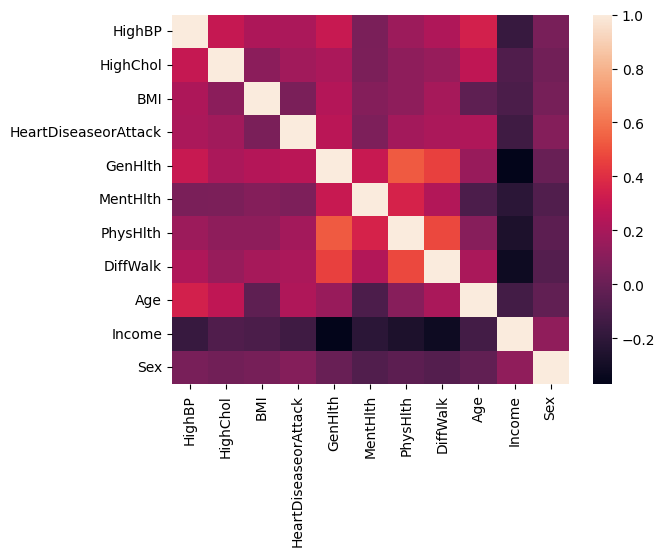

In [53]:
# plot the heat map for the corrleation between the data
sns.heatmap(X_new.corr())

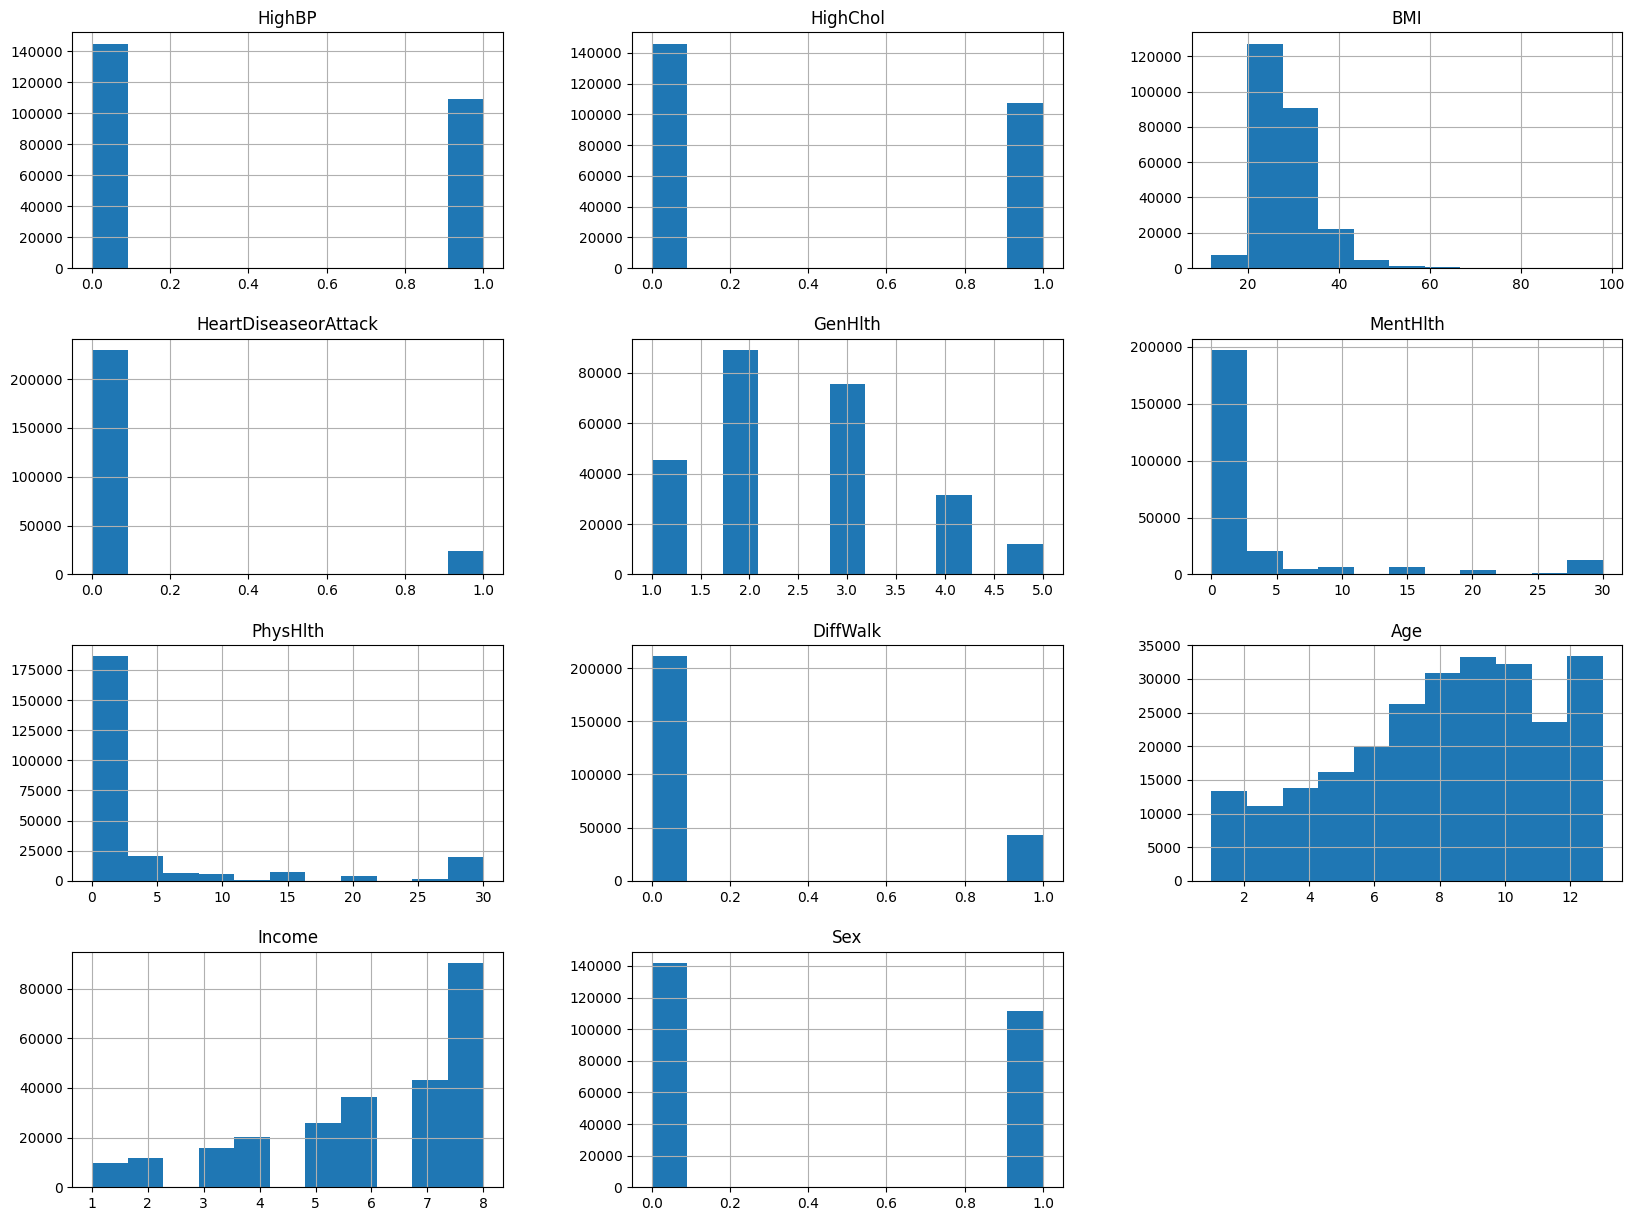

In [66]:
%matplotlib inline

X_new.hist(bins=11, figsize=(15,8))
plt.show()

In [37]:
# Using train_test_split in the new dataset 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=142)

In [38]:
X_train.shape

(202944, 11)

In [69]:
model_re = LogisticRegression(solver='sag',random_state=42 ,multi_class='multinomial')
model_re.fit(X_train,y_train)

C:\Users\aabub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42, solver='sag')

In [70]:
X_test.tail(10)


,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income,Sex
51529,1,0,35,0,4,0,1,0,10,4,1
186176,1,0,38,1,1,0,30,1,10,7,0
78513,1,1,22,1,5,30,30,1,8,2,0
237621,1,1,26,0,4,5,10,0,9,2,0
253048,0,0,35,0,4,0,7,0,4,4,0
70287,1,0,38,0,2,1,1,0,3,8,0
105279,0,1,19,0,2,0,0,0,8,8,0
64058,1,1,27,0,2,0,0,1,10,7,0
139617,1,0,30,0,3,10,2,0,2,5,1
249461,0,0,28,0,1,0,0,0,6,8,1


In [71]:
y_test.tail(10)

51529     0
186176    2
78513     0
237621    2
253048    0
70287     0
105279    0
64058     0
139617    0
249461    0
Name: Diabetes_012, dtype: int64

In [42]:
X_train[1:2]

,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income,Sex
196220,0,0,19,0,4,3,30,1,9,3,1


In [72]:
model_re.predict(X_test[:1])

array([0], dtype=int64)

In [44]:
X_test[:1]

,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Income,Sex
210505,1,0,29,0,2,0,0,0,12,2,0


In [73]:
X_new.columns

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income', 'Sex'],
      dtype='object')

In [74]:
# Check the accuracy of the model
model_score = model_re.score(X_test,y_test)
print("The logisticRegrasion model after features selection score is: ", "%",np.round(model_score,3) * 100)

The logisticRegrasion model after features selection score is:  % 84.7


In [75]:
# Dump the model to be used in the web application using pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(model_re, files)

In [92]:
y_pred = model_re.predict(X_test)


In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm =confusion_matrix(y_test, y_pred)


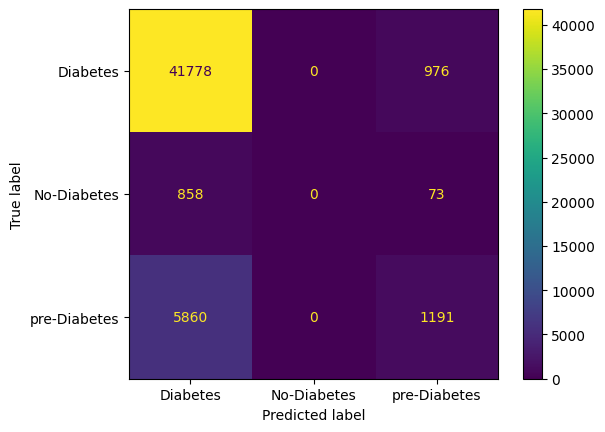

In [106]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Diabetes","No-Diabetes","pre-Diabetes"])
cm_display.plot()
plt.show()
